## 1. Linear intuition...

An operator $H$ (or system) is *linear* if two properties hold ($f1$ and $f2$ are some functions, $a$ is constant):
    
- **Additivity** (things sum):
    - $H(f1+f2)=H(f1)+H(f2)$ : looks like distributive law
- **Multiplicative scaling** (Homogeneity of degree 1):
    - $H(a\cdot f1)=a \cdot H(f1)$
    
Because it is sums and multiples, the *filtering* operation we were doing are linear.

What linearity is going to allow us to do is...
- to build up a signal or a function (image), a piece at a time
- then be able to say how a linear operator affects that whole image.

## 2. Impulse Function And Response

### 1) An impluse function

- In the discrete world, an *impulse* is just a value of 1 at a single location.
<img src="images/4/impulse_discrete.png" width="300px" height="300px">

- In the continuous world, an *impulse* is an idealized function that is very narrow and very tall so that it has a unit area. In the limit:
<img src="images/4/impulse_continuous.png" width="300px" height="300px">

### 2) An impulse response

If I have an unknown system and I 'put in' an impulse, the reponse is called the impulse reponse.
<img src="images/4/impulse_response.png" width="300px" height="300px">

So if the black box is linear, you can describe $H$ by $h(x)$. In other world, if I know what the impulse reponse of some black box $H$ is (maybe we'll call that $h(x)$), I can describe what this operators going to do by $h(x)$.

Because any sequence of pulses (we're going to do this in $2D$ in a minute) can be described by just adding in a shifted set and scaled set of those single impulses. 
If I know how this black box effects just the single impulse, I'll be able to say how it affects the entire image.

## 3. Filtering An Impulse Signal

What is the result of filtering the impulse signal (image) $F$ with the arbitrary kernel $H$?
<img src="images/4/filtering1.png" width="400px" height="300px">
<img src="images/4/filtering2.png" width="400px" height="300px">
<img src="images/4/filtering3.png" width="400px" height="300px">
<img src="images/4/filtering4.png" width="400px" height="300px">
<img src="images/4/filtering5.png" width="400px" height="300px">
<img src="images/4/filtering6.png" width="400px" height="300px">

## 4. Correlation Vs Convolution

#### Cross-correlation :
$$
\begin{align}
G=& H \otimes F \\
G[i, j]=&\sum^k_{u=-k}\sum^k_{v=-k}H[u, v]F[i+u, j+v]
\end{align}
$$
- Centered at zero
- It ends up with that filpped result.
- kernel $H$
#### Convolution : 
- Centered at zero
- Flip in both dimensions (bottom to top, right to left)
    - either flipped the kernel or filpped the axis to the pixels (it doesn't matter and gets the same value)
- kernel $H$
    - For a circularly symmetric or for a symmetric filter (kernel, or mask), whether I do convolution or correlation doesn't matter (there's no change).
$$
\begin{align}
G=& H \star F \\
G[i, j]=&\sum^k_{u=-k}\sum^k_{v=-k}H[u, v]F[i-u, j-v]
\end{align}
$$

## 5. Properties Of Convolution

- Linear and shift invariant
- Commutative:
    - $f*g = g*f$
- Associative
    - $(f*g)*h=f*(g*h)$
- Identity:
    - unit impulse $e = [\dots, 0, 0, 1, 0, 0, \dots]$. 
    - then $f*e=f$
- Differentiation:
    - $\frac{\partial}{\partial x} (f*g)=\frac{\partial f}{\partial x} *g$

## 6. Computational Complexity And Separability

If an image is $N \times N$ and a kernel (filter) is $W \times W$, how many multiplies do we need to compute a convolution?

<img src="images/4/complexity.png" width="400px" height="300px">

We need $N*N*W*W=N^2W^2$ which can get big.

#### Separability

In some cases, filter is separable, meaning you can get the square kernel $H$ by convolving a single column vector by some row vector:
<img src="images/4/separability.png" width="400px" height="300px">

Then, 
$$G=H*F=(C*R)*F=C*(R*F)$$

- So we do two convolutions but each is $W*N*N$. So this is useful if $W$ is big enough such that $2 \cdot W \cdot N \cdot N << W^2 \cdot N^2$.
- Used to be very important. Still, if $W=31$, save a factor of 15.

## 7. Boundary Issues

The common issue in fitering is what to do about the boundaries.
It is undefined until it is defined, and we have to think about what size operation we want.

<img src="images/4/boundary_issue.png" width="400px" height="300px">

Image is $f$ and filter is $g$.
- $g$ just touches that corner. The center point of $g$ as the reference, we would actually get a box that's bigger than the original function.
- put that filter with its middle at the corners, and we get back the same size.
- all of $g$ is actually touching $f$, then we are going to end up with a smaller output than the original.

### Methods
- __Clip filter__ (black)
    - original. <img src="images/4/clip1.png" width="210px">
    - set the outside boundary is black. <img src="images/4/clip2.png" width="200px">
    - then apply filter. <img src="images/4/clip3.png" width="200px">
    - and pull out the image. You can notice that this thing has gotten kind of dark at the edges, because that black has leaked in. <img src="images/4/clip4.png" width="210px">

- __Wrap around__
    - It has to do with some Fourier analysis.
    - original. <img src="images/4/clip1.png" width="210px">
    - Basically it says that we assume the picture continues and wraps around. <img src="images/4/wrap1.png" width="200px">
    - apply filter. <img src="images/4/wrap2.png" width="200px">
    - then cut back to the original size image. You will notice some different colours on the edges. <img src="images/4/wrap3.png" width="210px">
    
- __Copy edge (or replicate)__
    - original. <img src="images/4/clip1.png" width="210px">
    - Basically just extend out the same value. <img src="images/4/copy1.png" width="200px">
    - then run out filter, <img src="images/4/copy2.png" width="200px">
    - pull out the picture. <img src="images/4/clip3.png" width="200px">
    - The result is reasonable. The replicate method is an easy one, and it gives a reasonable result.
    
- __ Reflect across edge (or symmetric)__
    - original. <img src="images/4/clip1.png" width="210px">
    - Reflect the edges, <img src="images/4/reflection1.png" width="200px">
    - apply filter, <img src="images/4/reflection2.png" width="200px">
    - pull out the image, and it actually does a pretty good job. <img src="images/4/reflection3.png" width="200px">

### Code

```python
scipy.ndimage.filters.convolve(input, weights, output=None, mode='reflect', cval=0.0, origin=0)
```

- Multidimensional convolution. The array is convolved with the given kernel.
- Parameters:	
    - input : array_like
        - Input array to filter.
    - weights : array_like
        - Array of weights, same number of dimensions as input
    - output : ndarray, optional
        - The output parameter passes an array in which to store the filter output.
    - mode : {__‘reflect’,’constant’,’nearest’,’mirror’, ‘wrap’__}, optional
        - the mode parameter determines how the array borders are handled. For ‘constant’ mode, values beyond borders are set to be cval. Default is ‘reflect’.
    - cval : scalar, optional
        - Value to fill past edges of input if mode is ‘constant’. Default is 0.0
    - origin : array_like, optional
        - The origin parameter controls the placement of the filter. Default is 0.
- Returns:	
    - result : ndarray
        - The result of convolution of input with weights.

RuntimeError: filter weights array has incorrect shape.

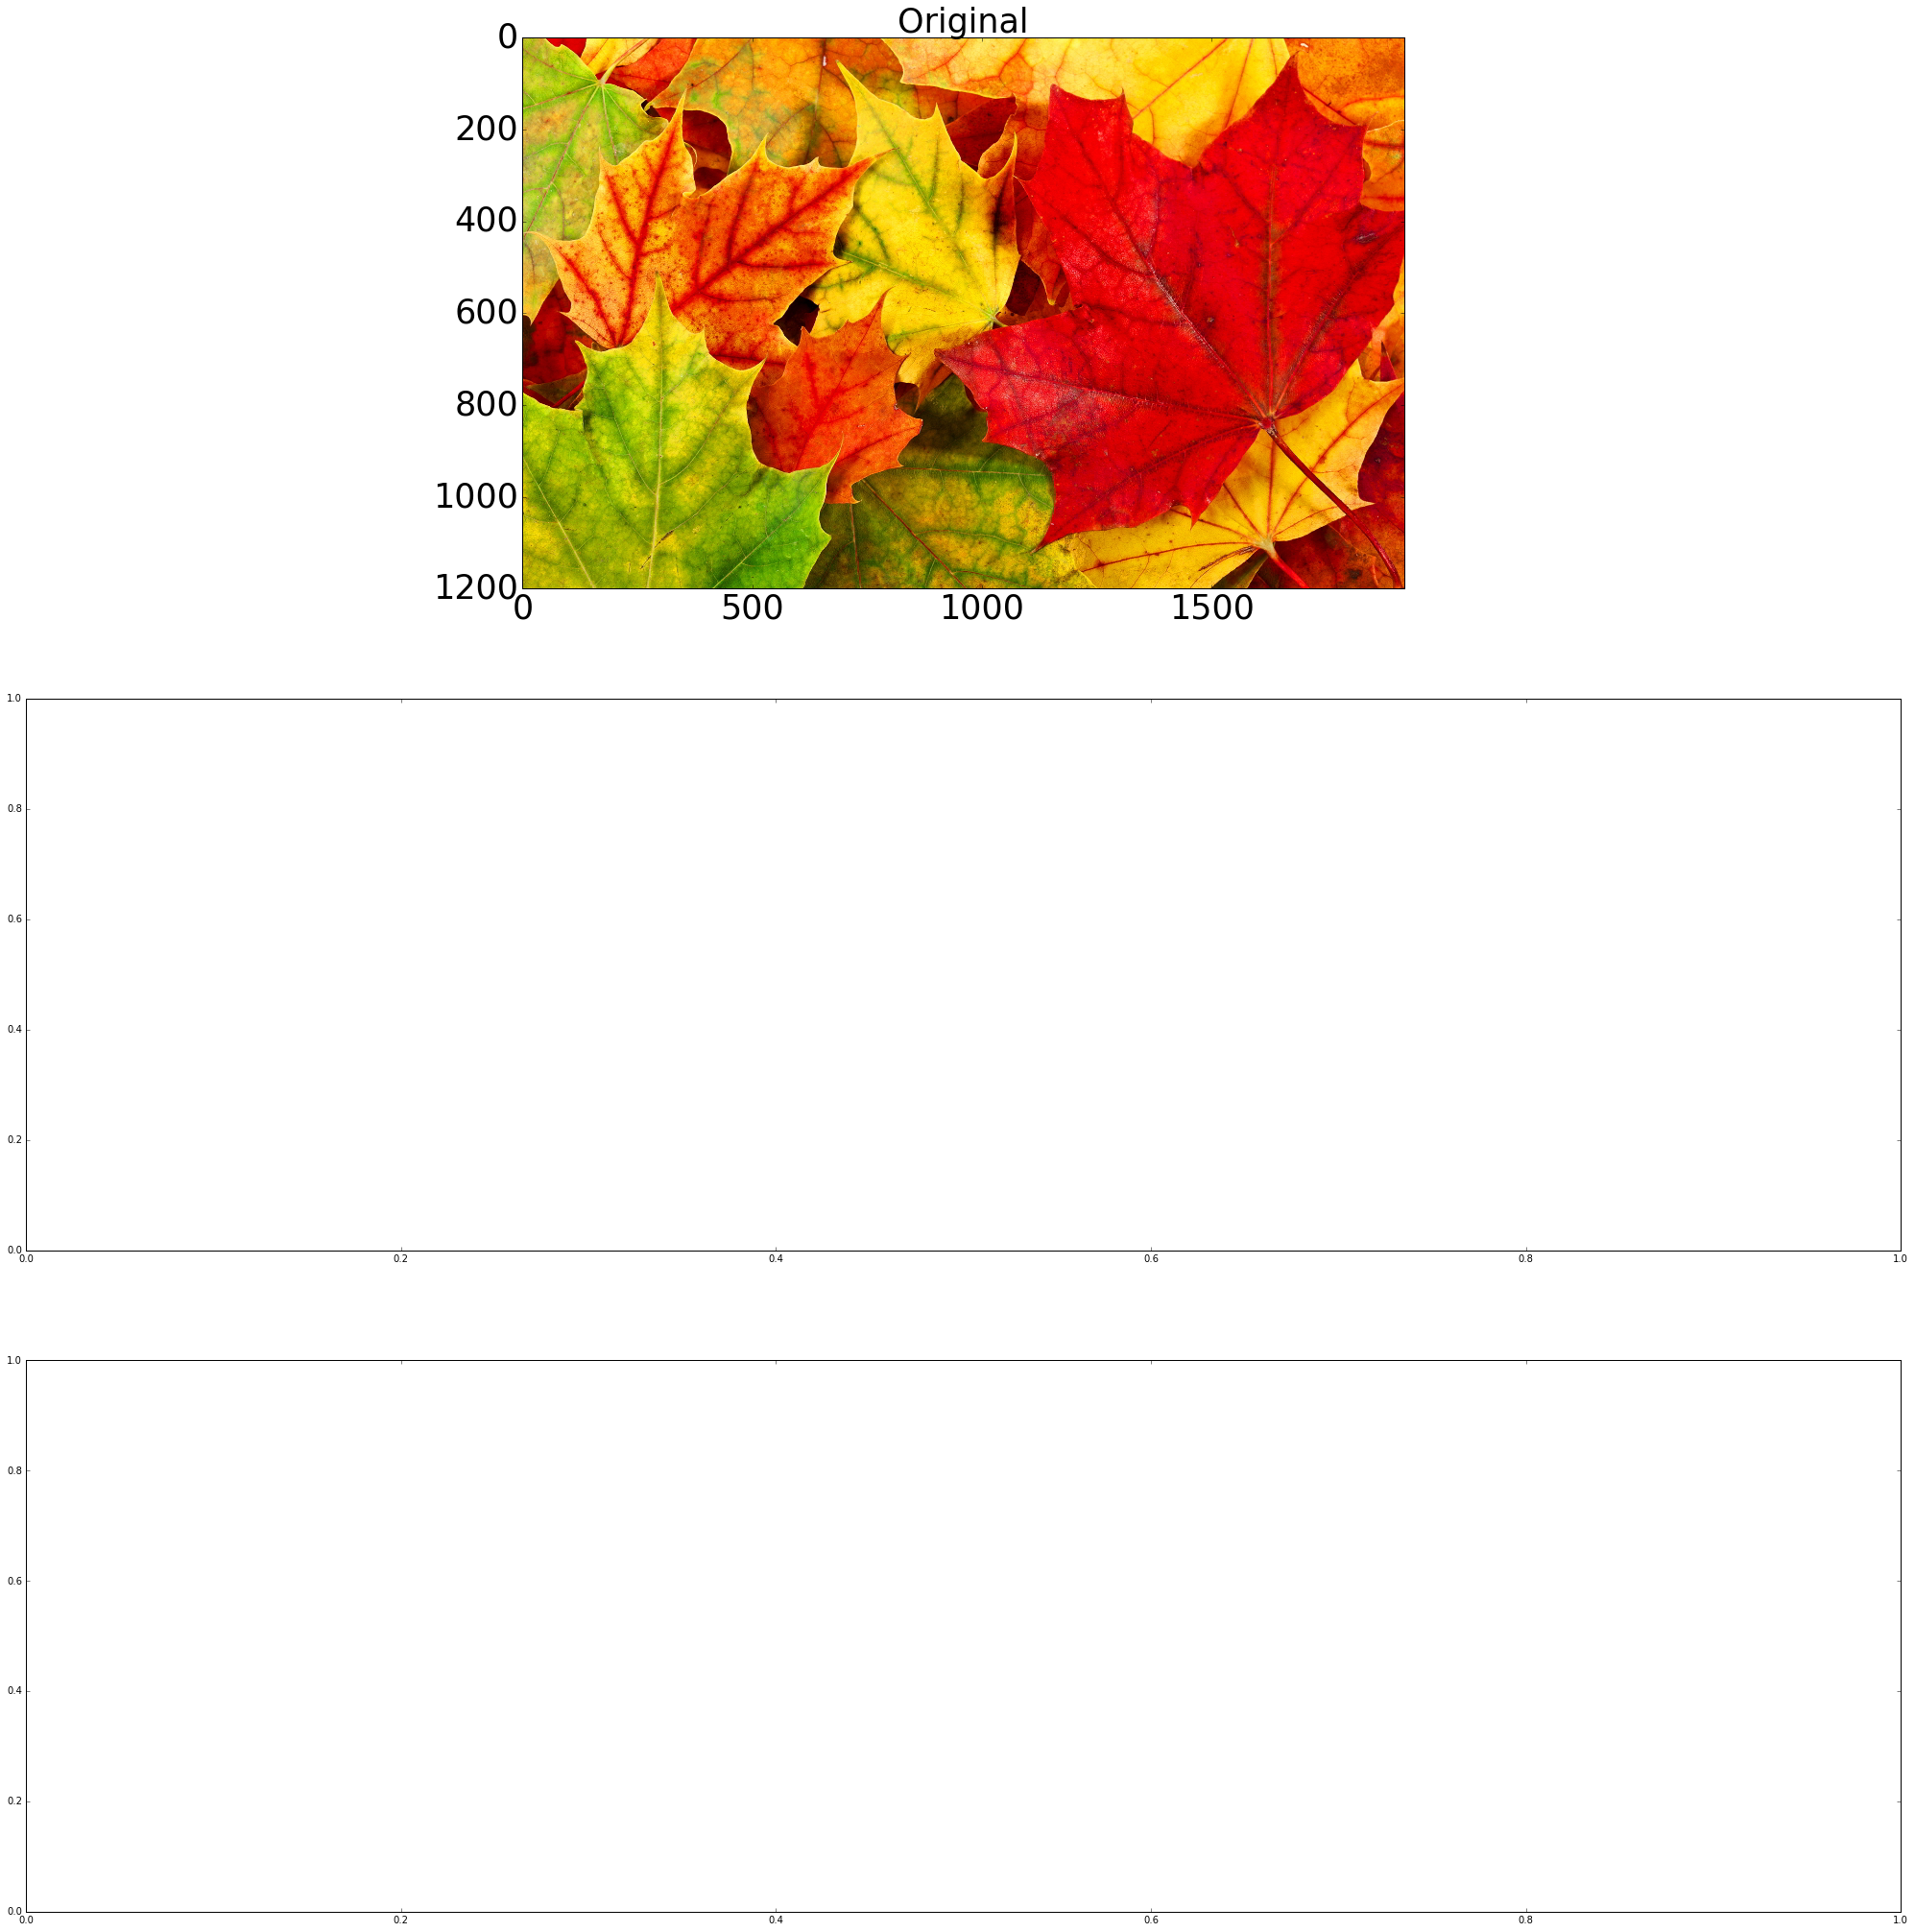

In [8]:
from PIL import Image
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt
%matplotlib inline

fig, axis = plt.subplots(3, 1, figsize=(35, 35))
## load an image
img = np.array(Image.open('images/4/autumn-leaves.png')) # read image to array
[n, m, d] = np.shape(img)

axis[0].imshow(img)
axis[0].set_title('Original', fontsize=35)
axis[0].tick_params(axis='x', labelsize=35)
axis[0].tick_params(axis='y', labelsize=35)

## Create a Gaussian filter

def fspecial_Gaussian(size, sigma):
    x, y = np.mgrid[-size//2 + 1:size//2 + 1, -size//2 + 1:size//2 + 1]
    g = np.exp(-((x**2 + y**2)/(2.0*sigma**2)))
    return g/g.sum()

filter_size = 21
filter_sigma = 3

gaussian_filter = fspecial_Gaussian(filter_size, filter_sigma)

## Apply Gaussian filter, specifying an edge parameter
scipy.ndimage.filters.correlate(img, gaussian_filter)
axis[1].imshow(smoothed)
axis[1].tick_params(axis='x', labelsize=15)
axis[1].tick_params(axis='y', labelsize=15)
axis[1].set_title('reflect', fontsize=15)

In [11]:
import numpy as np
import cv

# Load an color image in grayscale
img = cv2.imread('images/4/autumn-leaves.png',0)

ImportError: No module named 'cv'